# Importing necessary libraries

In [2]:
#Setting up environment with initial libraries needed for importing, cleaning, and initial visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline







In [3]:
# Load dataset and inspect the make sure it loaded correctly
df = pd.read_csv('kc_house_data.csv')
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# Data Cleaning

In [4]:
#Checking data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [5]:
df.sqft_basement.unique()[:5]

array(['0.0', '400.0', '910.0', '1530.0', '?'], dtype=object)

In [6]:
df.date.unique()[:5]

array(['10/13/2014', '12/9/2014', '2/25/2015', '2/18/2015', '5/12/2014'],
      dtype=object)

In [7]:
df.waterfront.unique()[:5]

array([nan,  0.,  1.])

In [8]:
df.condition.unique()[:5]

array([3, 5, 4, 1, 2])

In [9]:
df.price.unique()[:5]

array([221900., 538000., 180000., 604000., 510000.])

In [10]:
#Change numerical data stored as strings to ints
#df.sqft_basement = df.sqft_basement.apply(lambda x: float(x[0].replace ('', '?')))

#'[sqft_basement]'[1:-1].split(', ')
[int(i) for i in ['sqft_basement]]

SyntaxError: EOL while scanning string literal (<ipython-input-10-11beb25dc217>, line 5)

# Checking for Multicollinearity 

In [11]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,0.008188,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


In [12]:
df.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

In [13]:
df.price.sort_values().head()

15279    78000.0
465      80000.0
16184    81000.0
8267     82000.0
2139     82500.0
Name: price, dtype: float64

In [14]:
df.price.isna().sum()

0

In [15]:
#bedrooms
df.bedrooms.describe()

count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [16]:
#sqft
df.sqft_living.value_counts()

1300    138
1400    135
1440    133
1660    129
1010    129
       ... 
4970      1
2905      1
2793      1
4810      1
1975      1
Name: sqft_living, Length: 1034, dtype: int64

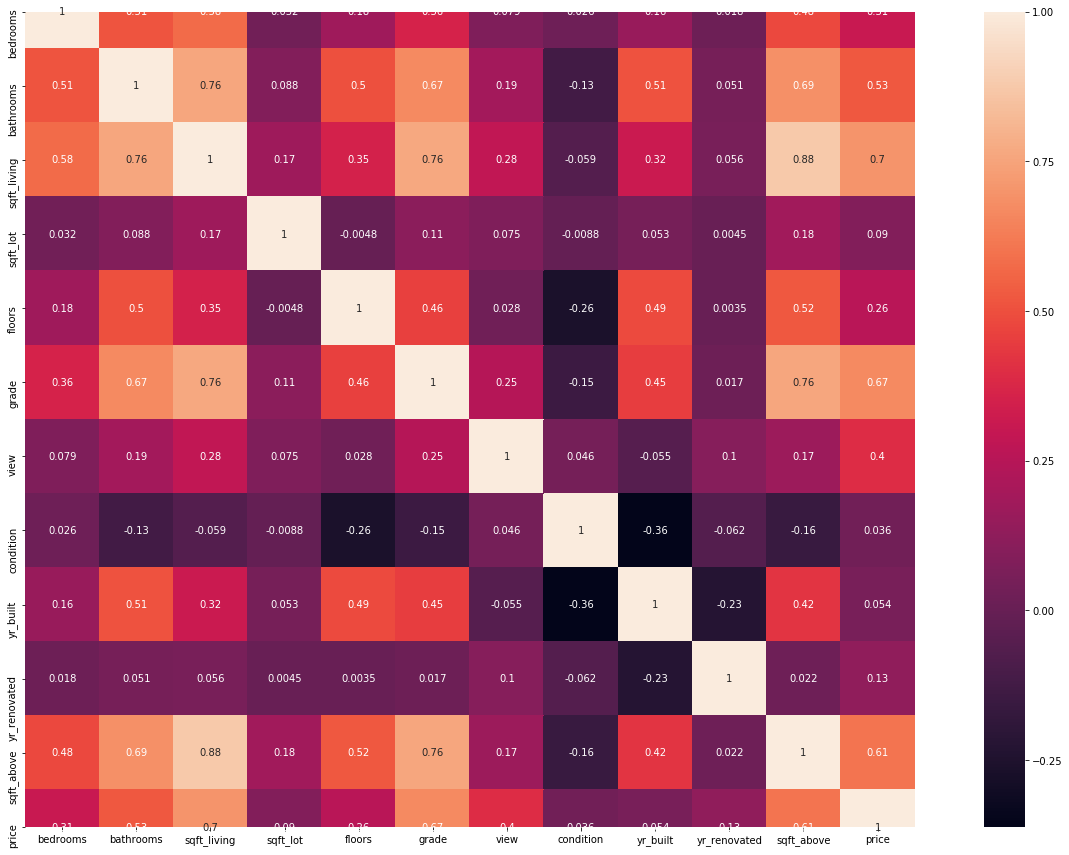

In [23]:
corrmat = df[["bedrooms","bathrooms","sqft_living","sqft_lot","floors","grade","view","condition","yr_built","yr_renovated","sqft_above","sqft_basement","price"]].corr()
fig,ax= plt.subplots()
fig.set_size_inches(25,15)
sns.heatmap(corrmat,square=True,annot=True)

Text(0, 0.5, 'Frequency')

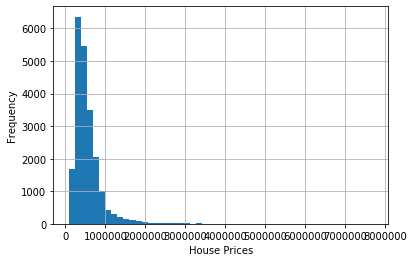

In [18]:
df['price'].hist(bins=50)
plt.xlabel("House Prices")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

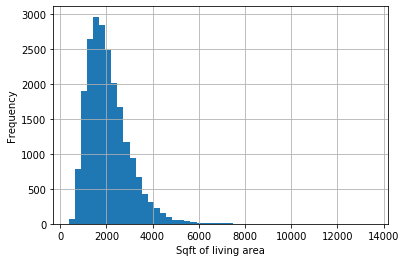

In [19]:
df['sqft_living'].hist(bins=50)
plt.xlabel("Sqft of living area")
plt.ylabel("Frequency")

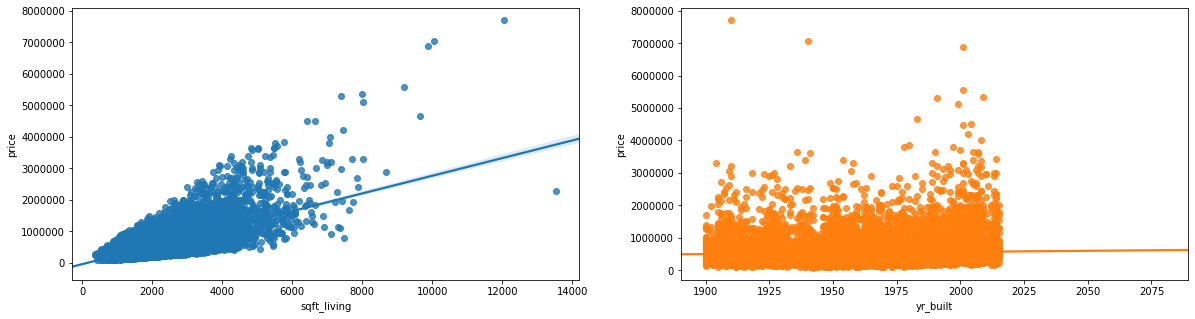

In [20]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(20, 5)
sns.regplot(x="sqft_living", y="price", data=df,ax=ax1)
sns.regplot(x="yr_built", y="price", data=df,ax=ax2)

In [21]:
# Looking for duplicates and missing values
duplicate_rows = df[df.duplicated()]
print(f"The df has {len(duplicate_rows)} duplicate rows.")

duplicate_id = df[df.duplicated('id')]
print(f'There are {len(duplicate_id)} duplicate values of id. ' 
      f'This represents {round(len(duplicate_id)/len(df),3)*100}% of all entries.')

for col in df:
    v = df[col].isna().sum()
    if v > 0:
        print(f'The column "{col}" has {v} missing values.')

The df has 0 duplicate rows.
There are 177 duplicate values of id. This represents 0.8% of all entries.
The column "waterfront" has 2376 missing values.
The column "view" has 63 missing values.
The column "yr_renovated" has 3842 missing values.
